In [60]:
# created a manual dataframe  
import pandas as pd
import numpy as np
data = {"Name" : ["Subham" , "Shamsher" , "Harshit" , "Manvinder" , "Raman"],
        "Age" : [20,22,20,21,20],
        "City" : ["Kangra" , "Amritsar" , "Sujanpur" , "Surat" , "Una"]
       }
df = pd.DataFrame(data)
df

,Name,Age,City
0,Subham,20,Kangra
1,Shamsher,22,Amritsar
2,Harshit,20,Sujanpur
3,Manvinder,21,Surat
4,Raman,20,Una


In [61]:
# write the dataframe to a csv file
df.to_csv("friend.csv" , index=False)

In [62]:
# read an excel file
# make sure you have the openpyxl library installed
df1 = pd.read_excel("top_stocks.xlsx")
df1

,Company,Symbol,Stock Price (USD),Market Cap (Trillions USD),PE Ratio,52-Week High,52-Week Low
0,Apple,AAPL,195.32,3.02,33.2,199.62,164.08
1,Microsoft,MSFT,408.23,3.16,38.6,420.82,315.00
2,Google,GOOGL,142.80,1.88,27.4,153.78,120.45
3,Amazon,AMZN,134.35,1.44,45.1,145.22,112.24
4,Tesla,TSLA,245.67,0.78,72.0,265.50,152.37
5,Meta,META,328.49,0.95,25.6,338.88,258.88


In [63]:
# converters argument in read_csv
def messy_converter(x):
    if x == ["NA" , "Not Available"]:
        return None
    return x
df5 = pd.read_excel("stocks_with_na.xlsx")
df5

,Company,Symbol,Stock Price (USD),Market Cap (Trillions USD),PE Ratio,52-Week High,52-Week Low
0,Apple,AAPL,195.32,3.02,33.2,199.62,164.08
1,Microsoft,MSFT,NaN,3.16,38.6,420.82,NaN
2,Google,GOOGL,142.80,NaN,27.4,NaN,120.45
3,Amazon,AMZN,134.35,1.44,NaN,145.22,112.24
4,Tesla,TSLA,245.67,0.78,NaN,NaN,152.37
5,Meta,META,328.49,NaN,25.6,338.88,258.88
6,Netflix,NFLX,NaN,0.20,46.7,495.35,NaN


In [64]:
# write the dataframe to an excel file with NA representation
df5.to_excel("Updated_stocks_with_na.xlsx", index=False, na_rep="Not Available")

In [65]:
# created 2 dataframes for motorsport data
motogp_data = {
    "Rider Name": ["Francesco Bagnaia", "Jorge Martín", "Marc Márquez", "Brad Binder", "Fabio Quartararo"],
    "Team": ["Ducati Lenovo Team", "Pramac Racing", "Gresini Racing", "Red Bull KTM Factory", "Yamaha Factory"],
    "Country": ["Italy", "Spain", "Spain", "South Africa", "France"],
    "Points": [265, 247, 198, 185, 172]
}
f1_data = {
    "Driver Name": ["Max Verstappen", "Lando Norris", "Charles Leclerc", "Lewis Hamilton", "Carlos Sainz Jr."],
    "Team": ["Red Bull Racing", "McLaren", "Ferrari", "Mercedes", "Ferrari"],
    "Country": ["Netherlands", "UK", "Monaco", "UK", "Spain"],
    "Points": [395, 265, 252, 230, 219]
}

df_motogp = pd.DataFrame(motogp_data)
df_f1 = pd.DataFrame(f1_data)

In [66]:
# write the dataframes to a single excel file with separate sheets
with pd.ExcelWriter("motorsport_data.xlsx") as writer:
    df_motogp.to_excel(writer,sheet_name ="motogp", index=False)
    df_f1.to_excel(writer, sheet_name = "f1" , index= False)

In [67]:
stock_df = pd.read_excel("stocks_with_na.xlsx")
stock_df

,Company,Symbol,Stock Price (USD),Market Cap (Trillions USD),PE Ratio,52-Week High,52-Week Low
0,Apple,AAPL,195.32,3.02,33.2,199.62,164.08
1,Microsoft,MSFT,NaN,3.16,38.6,420.82,NaN
2,Google,GOOGL,142.80,NaN,27.4,NaN,120.45
3,Amazon,AMZN,134.35,1.44,NaN,145.22,112.24
4,Tesla,TSLA,245.67,0.78,NaN,NaN,152.37
5,Meta,META,328.49,NaN,25.6,338.88,258.88
6,Netflix,NFLX,NaN,0.20,46.7,495.35,NaN


In [68]:
# fill different missing value in dataframe for different columns
fill_df = stock_df.fillna({
    "Stock Price (USD)" : "NA",
    "Market Cap (Trillions USD)" : "NA",
    "PE Ratio" : 0,
    "52-Week High" : "Not Available",
    "52-Week Low" : "Not Available"
})
fill_df

,Company,Symbol,Stock Price (USD),Market Cap (Trillions USD),PE Ratio,52-Week High,52-Week Low
0,Apple,AAPL,195.32,3.02,33.2,199.62,164.08
1,Microsoft,MSFT,NA,3.16,38.6,420.82,Not Available
2,Google,GOOGL,142.8,NA,27.4,Not Available,120.45
3,Amazon,AMZN,134.35,1.44,0.0,145.22,112.24
4,Tesla,TSLA,245.67,0.78,0.0,Not Available,152.37
5,Meta,META,328.49,NA,25.6,338.88,258.88
6,Netflix,NFLX,NA,0.2,46.7,495.35,Not Available


In [69]:
# forward fill missing values in the dataframe
new_df = stock_df.ffill()
new_df

,Company,Symbol,Stock Price (USD),Market Cap (Trillions USD),PE Ratio,52-Week High,52-Week Low
0,Apple,AAPL,195.32,3.02,33.2,199.62,164.08
1,Microsoft,MSFT,195.32,3.16,38.6,420.82,164.08
2,Google,GOOGL,142.80,3.16,27.4,420.82,120.45
3,Amazon,AMZN,134.35,1.44,27.4,145.22,112.24
4,Tesla,TSLA,245.67,0.78,27.4,145.22,152.37
5,Meta,META,328.49,0.78,25.6,338.88,258.88
6,Netflix,NFLX,328.49,0.20,46.7,495.35,258.88


In [70]:
# interpolate missing values in the dataframe using polynomial interpolation of order 2
intplt_df = stock_df.interpolate(method = "polynomial", order = 2)
intplt_df

/var/folders/k1/1kj0mp0j4vdfm5spx_2bcdpm0000gn/T/ipykernel_1479/3551071233.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  intplt_df = stock_df.interpolate(method = "polynomial", order = 2)


,Company,Symbol,Stock Price (USD),Market Cap (Trillions USD),PE Ratio,52-Week High,52-Week Low
0,Apple,AAPL,195.320000,3.020000,33.200000,199.620000,164.08000
1,Microsoft,MSFT,170.291351,3.160000,38.600000,420.820000,139.69018
2,Google,GOOGL,142.800000,2.431111,27.400000,312.748286,120.45000
3,Amazon,AMZN,134.350000,1.440000,18.719685,145.220000,112.24000
4,Tesla,TSLA,245.670000,0.780000,16.537008,188.050286,152.37000
5,Meta,META,328.490000,0.371111,25.600000,338.880000,258.88000
6,Netflix,NFLX,NaN,0.200000,46.700000,495.350000,NaN


In [71]:
# interpolate missing values in the dataframe using linear interpolation
intplt_df = stock_df.interpolate(method='linear')
intplt_df

/var/folders/k1/1kj0mp0j4vdfm5spx_2bcdpm0000gn/T/ipykernel_1479/4107694548.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  intplt_df = stock_df.interpolate(method='linear')


,Company,Symbol,Stock Price (USD),Market Cap (Trillions USD),PE Ratio,52-Week High,52-Week Low
0,Apple,AAPL,195.32,3.02,33.2,199.62,164.080
1,Microsoft,MSFT,169.06,3.16,38.6,420.82,142.265
2,Google,GOOGL,142.80,2.30,27.4,283.02,120.450
3,Amazon,AMZN,134.35,1.44,26.8,145.22,112.240
4,Tesla,TSLA,245.67,0.78,26.2,242.05,152.370
5,Meta,META,328.49,0.49,25.6,338.88,258.880
6,Netflix,NFLX,328.49,0.20,46.7,495.35,258.880


In [72]:
# drop columns with any missing values
drop_df = stock_df.dropna()
drop_df

,Company,Symbol,Stock Price (USD),Market Cap (Trillions USD),PE Ratio,52-Week High,52-Week Low
0,Apple,AAPL,195.32,3.02,33.2,199.62,164.08


In [73]:
# drop columns with NaN
drop_df = stock_df.dropna(axis=1)
drop_df

,Company,Symbol
0,Apple,AAPL
1,Microsoft,MSFT
2,Google,GOOGL
3,Amazon,AMZN
4,Tesla,TSLA
5,Meta,META
6,Netflix,NFLX


In [74]:
# drop rows with NaN in a specific column
drop_df = stock_df.dropna( subset=["Market Cap (Trillions USD)"])
drop_df

,Company,Symbol,Stock Price (USD),Market Cap (Trillions USD),PE Ratio,52-Week High,52-Week Low
0,Apple,AAPL,195.32,3.02,33.2,199.62,164.08
1,Microsoft,MSFT,NaN,3.16,38.6,420.82,NaN
3,Amazon,AMZN,134.35,1.44,NaN,145.22,112.24
4,Tesla,TSLA,245.67,0.78,NaN,NaN,152.37
6,Netflix,NFLX,NaN,0.20,46.7,495.35,NaN


In [75]:
# keep rows with at least 6 non-NaN values using the thresh parameter
drop_df = stock_df.dropna(thresh=6)
drop_df

,Company,Symbol,Stock Price (USD),Market Cap (Trillions USD),PE Ratio,52-Week High,52-Week Low
0,Apple,AAPL,195.32,3.02,33.2,199.62,164.08
3,Amazon,AMZN,134.35,1.44,NaN,145.22,112.24
5,Meta,META,328.49,NaN,25.6,338.88,258.88


In [76]:
# read a csv file with special values
apcl_df = pd.read_csv("apocalypse.csv")
apcl_df

,Date,Event,Location,Impact,Deaths,Recovery_Count,Infection_Rate
0,1347,Black_Death,Europe,Mass_death,75000000,0,0.0
1,1918,Spanish_Flu,Global,Pandemic,50000000,20000000,5.6
2,1986,Chernobyl,Ukraine,Radiation,-9999,0,0.0
3,2003,SARS,China,Outbreak,774,8000,3.1
4,2020,COVID19,Global,Pandemic,-1,250000000,0.0


In [77]:
# replace special values in the dataframe with NaN
apcl_df1 = apcl_df.replace([-9999, -1], np.nan)
apcl_df1

,Date,Event,Location,Impact,Deaths,Recovery_Count,Infection_Rate
0,1347,Black_Death,Europe,Mass_death,75000000.0,0,0.0
1,1918,Spanish_Flu,Global,Pandemic,50000000.0,20000000,5.6
2,1986,Chernobyl,Ukraine,Radiation,NaN,0,0.0
3,2003,SARS,China,Outbreak,774.0,8000,3.1
4,2020,COVID19,Global,Pandemic,NaN,250000000,0.0


In [78]:
# replace special values in the dataframe with NaN for specific columns
apcl_df1 = apcl_df.replace({
    "Deaths": [-9999, -1],
    "Infection_Rate": [0.0],
},np.nan)
apcl_df1

,Date,Event,Location,Impact,Deaths,Recovery_Count,Infection_Rate
0,1347,Black_Death,Europe,Mass_death,75000000.0,0,NaN
1,1918,Spanish_Flu,Global,Pandemic,50000000.0,20000000,5.6
2,1986,Chernobyl,Ukraine,Radiation,NaN,0,NaN
3,2003,SARS,China,Outbreak,774.0,8000,3.1
4,2020,COVID19,Global,Pandemic,NaN,250000000,NaN


In [79]:
# interpolate missing values in the Infection_Rate column using linear interpolation
apcl_df1["Infection_Rate"] = apcl_df1["Infection_Rate"].interpolate(method="linear")
apcl_df1

,Date,Event,Location,Impact,Deaths,Recovery_Count,Infection_Rate
0,1347,Black_Death,Europe,Mass_death,75000000.0,0,NaN
1,1918,Spanish_Flu,Global,Pandemic,50000000.0,20000000,5.60
2,1986,Chernobyl,Ukraine,Radiation,NaN,0,4.35
3,2003,SARS,China,Outbreak,774.0,8000,3.10
4,2020,COVID19,Global,Pandemic,NaN,250000000,3.10


In [80]:
# create a new dataframe of genocide data
gen_df = pd.read_csv("genocide.csv")
gen_df

,Event,Year,Deaths,Cause_Code,Severity_Index,Source_Info
0,Holocaust,1941,6000000,101,9.5,NaziArchive1945
1,Rwandan Genocide,1994,800000,202,8.7,UNReport1994
2,Armenian Genocide,1915,1500000,303,9.0,OttomanFiles1915


In [81]:
# replace special values in the Source_Info column with an empty string using regex
newgen_df = gen_df.replace({"Source_Info" : '[A-Za-z]'},"",regex=True)
newgen_df

,Event,Year,Deaths,Cause_Code,Severity_Index,Source_Info
0,Holocaust,1941,6000000,101,9.5,1945
1,Rwandan Genocide,1994,800000,202,8.7,1994
2,Armenian Genocide,1915,1500000,303,9.0,1915


In [82]:
# create a new dataframe from student csv file
std_df = pd.read_csv("student.csv")
std_df

,Student_ID,Name,Subject,Marks
0,101,Aarav,Math,A
1,102,Ishita,Science,B
2,103,Rahul,English,A
3,104,Meera,History,C
4,105,Vikram,Math,D
5,106,Sana,Science,B
6,107,Neha,English,F
7,108,Karan,History,B
8,109,Divya,Math,A+
9,110,Arjun,Science,C


In [83]:
# replace the list of values in the Marks column with corresponding numeric values
# can be done with(specific columns) / without using a dictionary
upd_df = std_df.replace({"Marks" : ["A+","A","B","C","D","E","F"]},{"Marks" :[100,95,80,70,60,50,20]})
upd_df

/var/folders/k1/1kj0mp0j4vdfm5spx_2bcdpm0000gn/T/ipykernel_1479/3228340573.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  upd_df = std_df.replace({"Marks" : ["A+","A","B","C","D","E","F"]},{"Marks" :[100,95,80,70,60,50,20]})


,Student_ID,Name,Subject,Marks
0,101,Aarav,Math,95
1,102,Ishita,Science,80
2,103,Rahul,English,95
3,104,Meera,History,70
4,105,Vikram,Math,60
5,106,Sana,Science,80
6,107,Neha,English,20
7,108,Karan,History,80
8,109,Divya,Math,100
9,110,Arjun,Science,70


In [84]:
# read a csv file with weather data
df = pd.read_csv("weather.csv")
df

,Date,Temperature,Wind_Speed,Weather,City
0,2025-07-25,32.5,15,Sunny,Delhi
1,2025-07-26,31.0,10,Cloudy,Delhi
2,2025-07-27,30.0,12,Rain,Delhi
3,2025-07-28,29.5,20,Rain,Mumbai
4,2025-07-29,31.5,18,Sunny,Mumbai
5,2025-07-30,28.0,25,Storm,Mumbai
6,2025-07-31,30.5,8,Cloudy,Bangalore
7,2025-08-01,29.0,15,Rain,Bangalore
8,2025-08-02,27.5,10,Sunny,Bangalore
9,2025-08-03,34.0,14,Sunny,Chennai


In [85]:
# group the dataframe by City
g = df.groupby("City")
g

In [86]:
# iterate through the groups and print the city name and corresponding dataframe
for city, city_df in g:
    print(f"City: {city}")
    print(city_df)
    print("\n")

City: Bangalore
         Date  Temperature  Wind_Speed Weather       City
6  2025-07-31         30.5           8  Cloudy  Bangalore
7  2025-08-01         29.0          15    Rain  Bangalore
8  2025-08-02         27.5          10   Sunny  Bangalore


City: Chennai
          Date  Temperature  Wind_Speed Weather     City
9   2025-08-03         34.0          14   Sunny  Chennai
10  2025-08-04         33.0          16  Cloudy  Chennai
11  2025-08-05         32.0          13    Rain  Chennai


City: Delhi
         Date  Temperature  Wind_Speed Weather   City
0  2025-07-25         32.5          15   Sunny  Delhi
1  2025-07-26         31.0          10  Cloudy  Delhi
2  2025-07-27         30.0          12    Rain  Delhi


City: Mumbai
         Date  Temperature  Wind_Speed Weather    City
3  2025-07-28         29.5          20    Rain  Mumbai
4  2025-07-29         31.5          18   Sunny  Mumbai
5  2025-07-30         28.0          25   Storm  Mumbai




In [87]:
# get the group for a specific city
g.get_group("Delhi")


,Date,Temperature,Wind_Speed,Weather,City
0,2025-07-25,32.5,15,Sunny,Delhi
1,2025-07-26,31.0,10,Cloudy,Delhi
2,2025-07-27,30.0,12,Rain,Delhi


In [88]:
# get the mean of numeric columns in each group
g.mean(numeric_only=True)

,Temperature,Wind_Speed
City,,
Bangalore,29.000000,11.000000
Chennai,33.000000,14.333333
Delhi,31.166667,12.333333
Mumbai,29.666667,21.000000


In [89]:
# get the descriptive statistics for each group
g.describe()

Temperature                                                       \
                count       mean       std   min    25%   50%    75%   max   
City                                                                         
Bangalore         3.0  29.000000  1.500000  27.5  28.25  29.0  29.75  30.5   
Chennai           3.0  33.000000  1.000000  32.0  32.50  33.0  33.50  34.0   
Delhi             3.0  31.166667  1.258306  30.0  30.50  31.0  31.75  32.5   
Mumbai            3.0  29.666667  1.755942  28.0  28.75  29.5  30.50  31.5   

          Wind_Speed                                                     
               count       mean       std   min   25%   50%   75%   max  
City                                                                     
Bangalore        3.0  11.000000  3.605551   8.0   9.0  10.0  12.5  15.0  
Chennai          3.0  14.333333  1.527525  13.0  13.5  14.0  15.0  16.0  
Delhi            3.0  12.333333  2.516611  10.0  11.0  12.0  13.5  15.0  
Mumbai           3.0  21.000000  3.605551  18.0  19.0  20.0  22.5  25.0

City
Bangalore    Axes(0.125,0.11;0.775x0.77)
Chennai      Axes(0.125,0.11;0.775x0.77)
Delhi        Axes(0.125,0.11;0.775x0.77)
Mumbai       Axes(0.125,0.11;0.775x0.77)
dtype: object

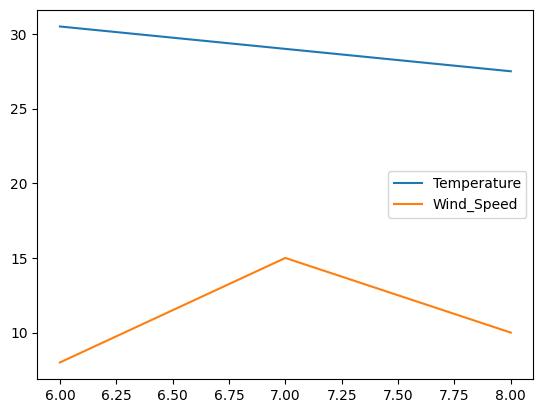

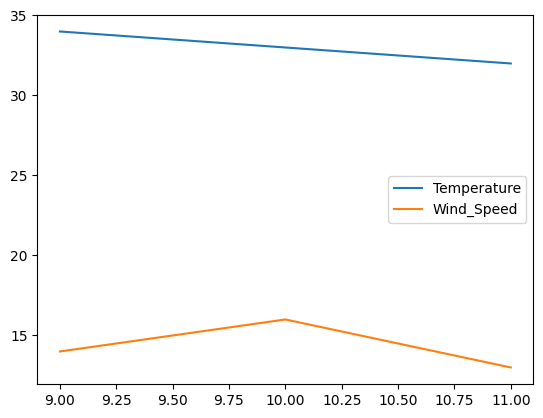

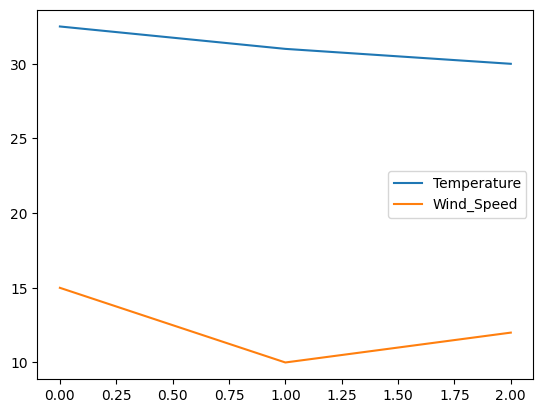

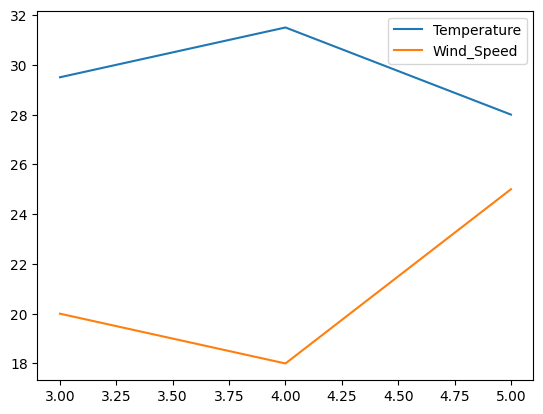

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
g.plot()